## Data Preprocessing-- Predicting Employee Exit

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Loading dataset

In [2]:
data=pd.read_excel("C:/Users/PC-LENOVO/Documents/Machine Learning/new sir/HR_ass2.xlsx")
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales1,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales1,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


### Checking if any null-values

In [4]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales1                   0
salary                   0
dtype: int64

In [5]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales1', 'salary'],
      dtype='object')

In [6]:
data['sales1'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
data['left'].unique()

array([1, 0], dtype=int64)

# data encoding

### Label encoding the salary column

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [9]:
data['salary']=le.fit_transform(data['salary'])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales1,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


### One hot encoding the sales column

In [10]:
data1=pd.get_dummies(data['sales1'], drop_first=True)
data1

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [11]:
data=pd.concat([data,data1], axis=1)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales1,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,1,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,1,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,1,0,0,0,0,0,0,0,1,0


In [12]:
data=data.drop('sales1', axis=1)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,0,1,0


### Splitting data into X and Y

In [13]:
X= data.drop('left', axis=1)
y= data[('left')]

In [14]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

### Training and Testing the datasets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.25, random_state=42)

### Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()


In [17]:
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

### Applying Knn Classification algo

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors= 2, metric='minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### Prediction

In [19]:
y_pred=model.predict(X_test)


In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Creating Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm= confusion_matrix(y_pred, y_test)
cm

array([[2788,   80],
       [  65,  817]], dtype=int64)

In [22]:
ac=accuracy_score(y_pred, y_test )
ac

0.9613333333333334

In [23]:
cr=classification_report(y_pred, y_test )
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2868
           1       0.91      0.93      0.92       882

    accuracy                           0.96      3750
   macro avg       0.94      0.95      0.95      3750
weighted avg       0.96      0.96      0.96      3750



1. By this Classification report when k =2, we get the highest accuracy 96%
2. precision is 91% and f1 score is 92%

### Data visualizations

<AxesSubplot:>

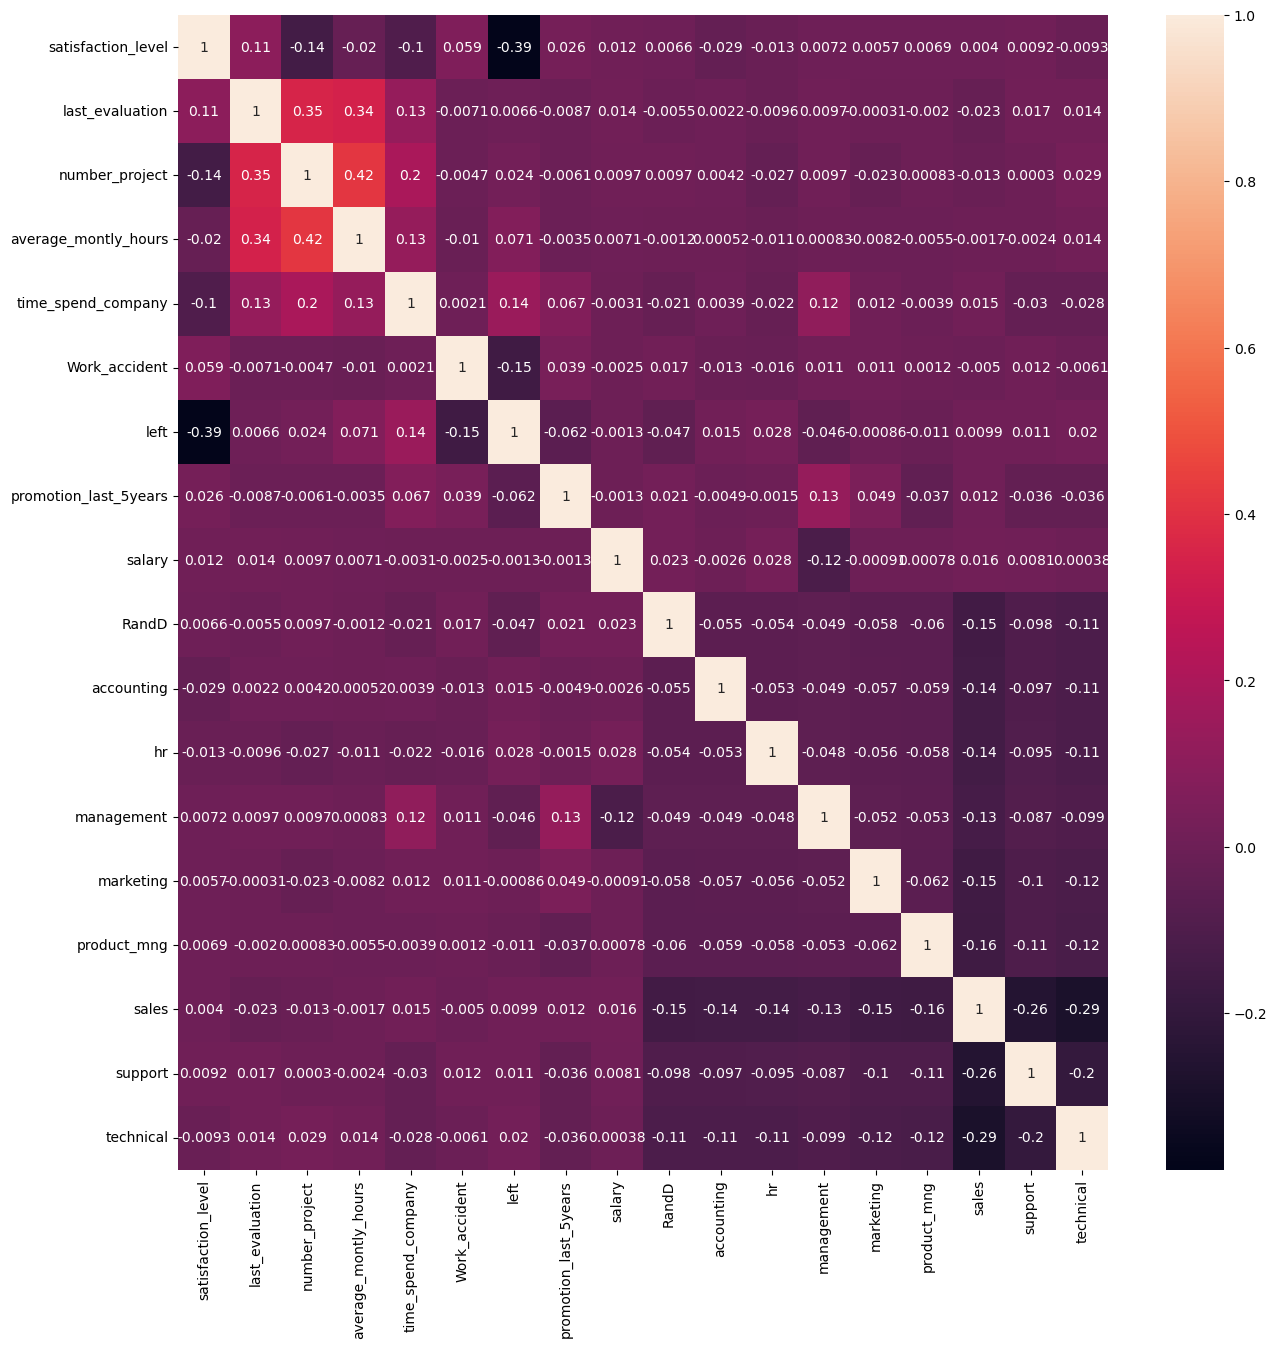

In [24]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot = True)
